In [48]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import lxml.etree as ET
import pandas as pd
import matplotlib.pyplot as plt

def make_polygon(coordinates):
    # Splitting coordinates and creating DataFrame
    split_coords = coordinates[:-1].split(" ")
    latitudes = [float(coord.split(",")[0]) for coord in split_coords]
    longitudes = [float(coord.split(",")[1]) for coord in split_coords]
    df = pd.DataFrame({"lat": latitudes, "long": longitudes})

    # Creating Polygon from DataFrame
    polygon_geom = Polygon(zip(df['lat'], df['long']))
    polygon = gpd.GeoDataFrame(index=[0], geometry=[polygon_geom])
    return polygon

def make_point(coordinates):
    # Extracting latitude and longitude
    lat, long = (float(coord) for coord in coordinates.split(","))
    point_geom = Point(lat, long)
    point = gpd.GeoDataFrame(index=[0], geometry=[point_geom])
    return point

## Data Preprocessing

In [49]:
import lxml.etree as ET
import geopandas as gpd
from shapely.geometry import Polygon

def read_polygons(file_path, count):
    polygons = []
    with open(file_path, 'r') as f:
        for line in f:
            count -= 1
            if count == 0:
                break
            # Extract polygon data from line
            polygon_data = '<' + line.split(":<")[1]
            polygon_data = polygon_data.replace('srsName', 'crsName')
            
            # Parse XML data
            root = ET.fromstring(polygon_data)
            coordinates = root.findall(".//{http://www.opengis.net/gml}coordinates")
            
            # Process coordinates and create polygon
            for c in coordinates:
                polygon = make_polygon(c.text)
                polygons.append(polygon.geometry[0])
    
    return polygons

# Example usage:
file_path = "data/poly15.txt"
polygon_count = 15
all_polygons = read_polygons(file_path, polygon_count)
print(all_polygons)

[<POLYGON ((-13165358.698 3983548.084, -13165367.41 3983543.004, -13165353.64...>, <POLYGON ((-13174631.661 3988114.442, -13174655.748 3988007.037, -13174597.4...>, <POLYGON ((-13163160.513 3978957.931, -13163161.779 3978956.55, -13163160.37...>, <POLYGON ((-13162035.201 3976815.52, -13162093.786 3976741.025, -13162031.48...>, <POLYGON ((-13181891.065 3988713.354, -13181873.589 3988580.072, -13181800.2...>, <POLYGON ((-13186624.719 4006953.974, -13186699.268 4006874.556, -13186554.7...>, <POLYGON ((-13149703.164 3995881.951, -13149833.974 3995779.004, -13149692.3...>, <POLYGON ((-13180226.801 3995733.193, -13180239.526 3995720.682, -13180226.9...>, <POLYGON ((-13189552.297 3995144.22, -13189625.445 3995091.947, -13189530.8 ...>, <POLYGON ((-13157805.874 3978441.921, -13157828.511 3978441.921, -13157753.3...>, <POLYGON ((-13147942.133 4004090.796, -13147944.359 4004010.931, -13147935.4...>, <POLYGON ((-13163231.37 3993899.892, -13163147.084 3993787.715, -13163090.31...>, <POLYGON ((-131

POLYGON ((-13163160.5125477 3978957.93103972, -13163161.7791721 3978956.54995031, -13163160.3704817 3978955.2623057, -13163034.1082609 3978842.50261086, -13162909.8145308 3978728.31718843, -13162889.1487078 3978707.23068043, -13162783.0962472 3978615.16047169, -13162716.0577091 3978455.98657965, -13162651.4386619 3978398.14564291, -13162527.4646251 3978286.43395187, -13162440.8937708 3978211.23419281, -13162401.2391857 3978213.50432331, -13162283.2405253 3978220.51437957, -13162157.2192914 3978071.85565281, -13162150.7703312 3977963.94943284, -13162144.3557267 3977856.04214539, -13162199.8056364 3977697.2619248, -13162131.6860121 3977637.36847086, -13161880.2639683 3977452.2406402, -13161864.6792396 3977190.0873644, -13162108.5311654 3977198.88921601, -13162130.2630702 3977174.70792081, -13162220.366085 3977072.21425301, -13162331.4093026 3976948.74195697, -13162375.1306967 3976900.5506837, -13162326.3128864 3976856.67640158, -13162202.3397413 3976747.29433026, -13162178.6864615 397664

<Axes: >

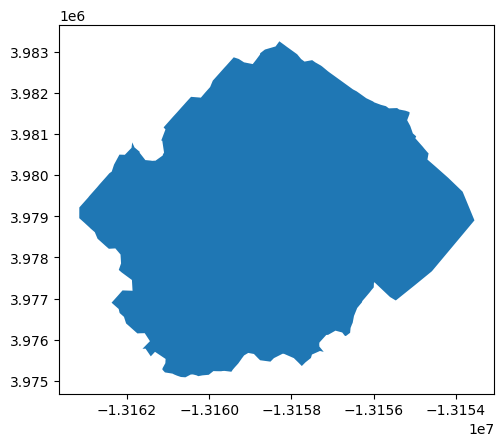

In [50]:
# get a polygon
polygon = all_polygons[2]
print(polygon)
# visualize the polygon (line string)

# create a geodataframe
gdf = gpd.GeoDataFrame(geometry=[polygon])
# plot the geodataframe
gdf.plot()


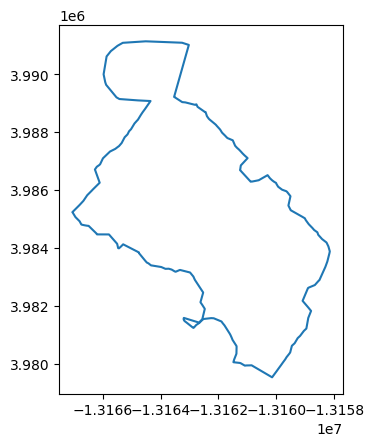

In [85]:
# import output.shp and visualize

file = "output.shp"
gdf = gpd.read_file(file)
gdf.plot()
plt.show()

In [55]:
import lxml.etree as ET
import geopandas as gpd
from shapely.geometry import Point

def read_points(file_path, count):
    points = []
    with open(file_path, 'r') as f:
        for line in f:
            count -= 1
            if count == 0:
                break
            
            # Extract point data from line
            point_data = '<' + line.split(":<")[1]
            point_data = point_data.replace('srsName', 'crsName')
            
            # Parse XML data
            root = ET.fromstring(point_data)
            coordinates = root.findall(".//{http://www.opengis.net/gml}coordinates")
            
            # Process coordinates and create point
            for c in coordinates:
                point = make_point(c.text)
                points.append(point.geometry[0])
            
            # Example usage for specific point
            if line.split(":<")[0] == "POINT:30:118523":
                print(point)
                break
    
    return points

# Example usage:
point_file = "data/points1000.txt"
point_count = 60
all_points = read_points(point_file, point_count)
print(all_points)


[<POINT (-13148438.178 3986007.337)>, <POINT (-13174008.657 4009260.508)>, <POINT (-13172687.596 3982107.396)>, <POINT (-13153240.87 4005783.647)>, <POINT (-13161794.861 3993727.197)>, <POINT (-13157693.632 3995813.539)>, <POINT (-13181920.578 3975637.6)>, <POINT (-13161974.641 4008094.96)>, <POINT (-13154990.513 3993088.308)>, <POINT (-13157379.018 3991554.604)>, <POINT (-13155117.322 3989249.268)>, <POINT (-13152078.721 4010028.541)>, <POINT (-13167512.504 3987519.605)>, <POINT (-13165170.55 3983082.901)>, <POINT (-13160791.625 3995332.34)>, <POINT (-13172406.69 3991809.344)>, <POINT (-13154120.507 4003274.759)>, <POINT (-13175995.867 3985032.872)>, <POINT (-13167340.75 3979801.404)>, <POINT (-13164531.689 4012040.181)>, <POINT (-13158539.561 3991898.57)>, <POINT (-13150640.482 4013260.553)>, <POINT (-13153847.627 4006573.454)>, <POINT (-13166881.669 4002555.078)>, <POINT (-13172045.525 3989258.317)>, <POINT (-13174040.761 3994301.452)>, <POINT (-13165764.465 4002562.844)>, <POINT (-

In [52]:
print(all_points[0])

POINT (-13148438.178342 3986007.33707501)


## Framework Preprocessing

### Boundary Simplification

In [ ]:
import arcpy.cartography as CA
CA.SimplifyPolygon("polygons/p_1_0.shp", "simplifiedPoly.shp", "POINT_REMOVE", 100)

### Trajectory Partitioining

In [ ]:
from shapely.geometry import LineString

def partition_trajectory(trajectory, mbr_polygon):
    segments = []
    # Partitioning process
    current_segment = [] 
    prev_direction = None 
    
    for i in range(len(trajectory.coords) - 1):
        dx = trajectory.coords[i+1][0] - trajectory.coords[i][0]
        dy = trajectory.coords[i+1][1] - trajectory.coords[i][1]
        
        # Determine quadrant or half-axis based on movement direction
        if dx >= 0 and dy >= 0:
            direction = 1  # First quadrant
        elif dx < 0 and dy >= 0:
            direction = 2  # Second quadrant
        elif dx < 0 and dy < 0:
            direction = 3  # Third quadrant
        else:
            direction = 4  # Fourth quadrant
        
        if direction != prev_direction and prev_direction is not None:
            segments.append(current_segment)
            current_segment = []
        
        current_segment.append(trajectory.coords[i])
        prev_direction = direction
    
    # Add last segment
    current_segment.append(trajectory.coords[-1])
    segments.append(current_segment)
    
    # Filtering process
    filtered_segments = []
    for segment in segments:
        bottom_left = mbr_polygon.bounds[:2]
        top_right = mbr_polygon.bounds[2:]
        inside_segment = binary_search_points(segment, bottom_left, top_right)
        
        if inside_segment:
            filtered_segments.append(segment)
    
    return filtered_segments

def binary_search_points(segment, bottom_left, top_right):
    # Binary search to find points inside MBR
    left_index = binary_search(segment, bottom_left[0], lambda x: x[0])
    right_index = binary_search(segment, top_right[0], lambda x: x[0])
    
    if left_index == right_index:
        return False  # No points inside MBR
    else:
        return segment[left_index:right_index+1]

def binary_search(sequence, target, key=lambda x: x):
    left, right = 0, len(sequence) - 1
    while left <= right:
        mid = (left + right) // 2
        mid_val = key(sequence[mid])
        
        if mid_val == target:
            return mid
        elif mid_val < target:
            left = mid + 1
        else:
            right = mid - 1
    return left

trajectory = LineString([(x,y) for x,y in all_polygons[0].exterior.coords])

polygonSimplified = all_polygons[0]
mbr_polygon = polygonSimplified.bounds

filtered_segments = partition_trajectory(trajectory, mbr_polygon)
print(filtered_segments)

## Performing Queries

Point (-13172687.5962544, 3982107.39594684) is inside Polygon 1
Point (-13161794.8611016, 3993727.19691904) is inside Polygon 11
Point (-13157379.0175406, 3991554.60372936) is inside Polygon 11
Point (-13160791.6251053, 3995332.33972004) is inside Polygon 11
Point (-13172406.6901755, 3991809.34448241) is inside Polygon 7
Point (-13158539.560941, 3991898.56976161) is inside Polygon 11
Point (-13174040.7609662, 3994301.45220997) is inside Polygon 7
Point (-13160793.2302829, 3995347.86195893) is inside Polygon 11
Point (-13157016.2474044, 3990548.62794342) is inside Polygon 11
Point (-13141643.4615867, 4005973.97244198) is inside Polygon 10
Point (-13141643.4615867, 4005973.97244198) is inside Polygon 13
Point (-13140755.7983772, 4007090.09560454) is inside Polygon 13
Point (-13144526.3605454, 3996117.53311543) is inside Polygon 6
Point (-13176910.8185042, 3994134.60475242) is inside Polygon 4
Point (-13176910.8185042, 3994134.60475242) is inside Polygon 7
Point (-13175923.6342839, 399824

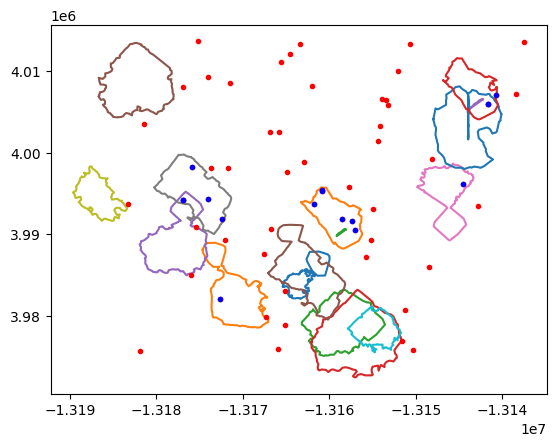

In [75]:
import rtree
from shapely.geometry import Point, Polygon, LineString
import matplotlib.pyplot as plt

# Plot polygons
for poly in all_polygons:
    plt.plot(*poly.exterior.xy)

# Plot points after size reduction
for point in all_points:
    plt.plot(point.x, point.y, 'ro', markersize=3)

# Create R-tree index
index = rtree.index.Index()
for i, polygon in enumerate(all_polygons):
    index.insert(i, polygon.bounds)

# Ray casting function
def ray_casting(point, poly):
    n = len(poly)
    inside = False
    p1x, p1y = poly[0]
    for i in range(n+1):
        p2x, p2y = poly[i % n]
        if point.y > min(p1y, p2y):
            if point.y <= max(p1y, p2y):
                if point.x <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (point.y-p1y)*(p2x-p1x)/(p2y-p1y)+p1x
                        if p1x == p2x or point.x <= xinters:
                            inside = not inside
        p1x, p1y = p2x, p2y
    return inside

# Perform range query and ray casting
for point in all_points:
    bbox = point.bounds
    intersected_polygons = [all_polygons[i] for i in index.intersection(bbox)]
    for polygon in intersected_polygons:
        if ray_casting(point, list(polygon.exterior.coords)):
            print(f"Point {point.coords[0]} is inside Polygon {all_polygons.index(polygon)}")
            # plot the points
            plt.plot(point.x, point.y, 'bo', markersize=3)

